In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 

def make_data() :
    sales = pd.read_csv("sales.csv", encoding="euc-kr", index_col=0)  
    scaler = MinMaxScaler() 
    salesnp = scaler.fit_transform(sales)
    X_sales_1_5 = salesnp[:,:-1]
    Y_sales_6 = salesnp[:,-1]
    X_sales_1_5 = X_sales_1_5.reshape(20,5,1 ) 
    Y_sales_6 = Y_sales_6[:,np.newaxis ]  
    
    print( X_sales_1_5.shape , Y_sales_6.shape  ) 
    return (X_sales_1_5, Y_sales_6) 

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

def make_model() :
    model = Sequential()
    model.add( SimpleRNN(10, input_shape=(5,1)) ) 
    model.add( Dense(1) )  #, activation="linear"
    model.compile( loss="mse" , optimizer='sgd')
    model.summary()
    return model


Using TensorFlow backend.


In [3]:
(X_data, Y_data) = make_data()   
model = make_model() 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
W0819 14:05:21.356480  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 14:05:21.369448  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 14:05:21.371459  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 14:05:21.451445  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-pack

(20, 5, 1) (20, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 학습
history = model.fit (X_data, Y_data, epochs=1000, verbose=0)

W0819 14:05:21.613477  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0819 14:05:21.628511  4232 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



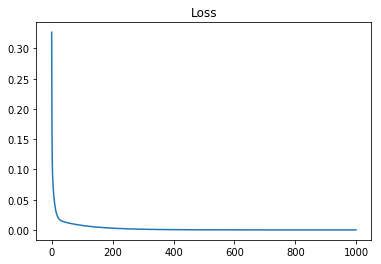

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

Text(0.5, 1.0, '  after fit   ')

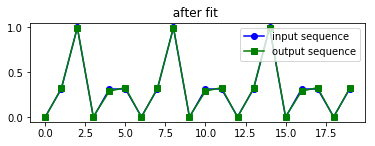

In [6]:
# 학습 후 예측 결과
plt.subplot(211)
plt.plot(  Y_data  , 'bo-', label="target")
plt.plot(  model.predict(X_data[:,: ,:]) , 'gs-', label="output sequence")
plt.legend()
plt.title("  after fit   ") 